## 1. Data collecting and cleaning

In [86]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from numpy.random import randn

### 20 Century

In [3]:
list_book_20_cen = []
for idx in range(200) :
    f  = open("20/20_"+str(idx)+".txt", "r", encoding ='utf-8')
    content = f.read()
    list_book_20_cen.append(content)


In [4]:
total_20 = 0
t_sen_20 = 0
sentences_20 =[]
for idx in range(len(list_book_20_cen)):
    total_20 += len(list_book_20_cen[idx])
    sentences_20.append(nltk.tokenize.sent_tokenize(list_book_20_cen[idx]))
    #sentences_20_all = [[sentences_20[idx][idx2]] for idx2 in range(len(sentences_20[idx])))
    t_sen_20 += len(sentences_20[idx])
    
#total number of words    
print("total number of words in 20c is ", total_20)
# total number of sentences 
print( "total number of senteces in 20c is ", t_sen_20)

total number of words in 20c is  86618416
total number of senteces in 20c is  834832


In [5]:
##make every literature into sencteces in one list
sentences_20_all =[]
for sentence in range(len(sentences_20)):
    for words in range(len(sentences_20[sentence])):
        sentences_20_all.append([sentences_20[sentence][words]])
                       

### 19Century

In [6]:
list_book_19_cen= []
for idx in range(200) :
    f = open("19/19_"+str(idx)+ ".txt", "r", encoding='utf-8')

    content = f.read()
    list_book_19_cen.append(content)
    

In [7]:
total_19 = 0
t_sen_19 = 0
sentences_19 = []
for idx in range(len(list_book_19_cen)):
    total_19 += len(list_book_19_cen[idx])
    sentences_19.append(nltk.tokenize.sent_tokenize(list_book_19_cen[idx]))
    t_sen_19 += len(sentences_19[idx])
    
#total number of words    
print("total number of words in 20c is ", total_19)
# total number of sentences 
print( "total number of senteces in 20c is ", t_sen_19)


total number of words in 20c is  141422786
total number of senteces in 20c is  950361


In [8]:
##make every literature into sencteces in one list
sentences_19_all =[]
for sentence in range(len(sentences_19)):
    for words in range(len(sentences_19[sentence])):
        sentences_19_all.append([sentences_19[sentence][words]])


["Will's ministerial dream came to pass in the course of time, however,\nand a gentle, bright-eyed lady ruled over the parsonage, whom the\nreverend William called his “little Jane.”\n\nFarther into futurity even this rash pen dares not proceed, but pauses\nhere, concluding in the words of the dear old fairy tales, “And so they\nwere married, and all lived happily till they died.”"]

### 17 century

In [9]:
list_book_17_cen = []
for idx in range(200) :
    idx =idx+1
    f  = open("17/17_"+str(idx)+".txt", "r", encoding ='utf-8')
    content = f.read()
    list_book_17_cen.append(content)


In [10]:
total_17 = 0
t_sen_17 = 0
sentences_17 =[]
for idx in range(len(list_book_17_cen)):
    total_17 += len(list_book_17_cen[idx])
    sentences_17.append(nltk.tokenize.sent_tokenize(list_book_17_cen[idx]))
    t_sen_17 += len(sentences_17[idx])
    
#total number of words    
print("total number of words in 20c is ", total_17)
# total number of sentences 
print( "total number of senteces in 20c is ", t_sen_17)

total number of words in 20c is  54741155
total number of senteces in 20c is  457982


In [11]:
##make every literature into sencteces in one list
sentences_17_all =[]
for sentence in range(len(sentences_17)):
    for words in range(len(sentences_17[sentence])):
        sentences_17_all.append([sentences_17[sentence][words]])
                       


In [1]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer, PorterStemmer


In [12]:
class Tokenize() :
    
    def __init__(self, book_list) :
        self.book_list = book_list
        
    def token_process(self) :
        # tokenize list
        t_list =[]
        
        for contents in self.book_list :
            
            #lower all character (regulization)
            contents = str(contents).lower()
           
            t_list.append(contents)
            
        #tokenize with removing punctuation
        #remove stop word
        #lemmatization
         
        regexp_tokenize = RegexpTokenizer(r'\w+')
        stop_words = set(stopwords.words('english'))
        token_sentence =[]
        for words in t_list :
            
            word_tokens = regexp_tokenize.tokenize(words)
            filter_sentence =[ fw  for fw in word_tokens if not fw in stop_words ]
            token_sentence.append(filter_sentence)
         
        #add postag
        #token_sentence = nltk.pos_tag(token_sentence)
        
        return token_sentence




In [13]:
class Counting():
    
    def __init__(self, word_list):
        self.word_list = word_list
        self.n = len(word_list)
    
    def word_cnt (self) :
        
        cnt = {}
        for idx in range(self.n) :
            for idx2 in range(len(self.word_list[idx])):
                word = self.word_list[idx][idx2]
                if word not in cnt.keys() :
                    cnt[word] = 1 
                
                else :
                    cnt[word] += 1        
        return cnt 
    
    def total(self) :
        t_list = []
        for i in range(self.n) :
            for j in range(len(self.word_list[i])) :
                t_list.append(self.word_list[i][j])
                
        return t_list

### list for w2v 20C

In [14]:
token = Tokenize(sentences_20_all)
list_w2v_20c = token.token_process()

### list of words in each literature 20C 

In [16]:
list_of_20_cen = token.token_process()

### list for w2v 19c

In [18]:
token = Tokenize(sentences_19_all)
list_w2v_19c = token.token_process()


###  list of words in each literature 19C 

In [19]:
list_of_19_cen = token.token_process()

### list for w2v 17c

In [20]:
token = Tokenize(sentences_17_all)
list_w2v_17c = token.token_process()

### list of words in each literature 17c

In [21]:
list_of_17_cen = token.token_process()

## 2. Word Embedding -Word2Vec

In [23]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.phrases import Phrases, Phraser
import gensim

### 17C model 

In [25]:
model_17 = Word2Vec(size=300, min_count=1)
bigram_transformer = Phrases(list_w2v_17c)
model_17.build_vocab(bigram_transformer[list_w2v_17c])
total_examples_17 = model_17.corpus_count

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [26]:
v_list_17 =bigram_transformer[list_w2v_17c]
v_list_17 = list(v_list_17)
count = Counting(v_list_17)
t_17 = count.total()

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [27]:
w_list_17 = count.word_cnt()
order_dict_17 = sorted(w_list_17.items(), key= lambda x : x[1], reverse = True)


In [28]:
model_17.train(v_list_17, total_examples = total_examples_17, epochs = model_17.iter)

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(24028145, 25282050)

###  19C model

In [29]:
model_19 = Word2Vec(size=300, min_count = 1)
bigram_transformer = Phrases(list_w2v_19c)
model_19.build_vocab(bigram_transformer[list_w2v_19c])
total_examples_19 = model_19.corpus_count

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [30]:
v_list_19 =bigram_transformer[list_w2v_19c]
v_list_19 = list(v_list_19)
count = Counting(v_list_19)
t_19 = count.total()

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [31]:
w_list_19 = count.word_cnt()
order_dict_19 = sorted(w_list_19.items(), key= lambda x : x[1], reverse = True)


In [32]:
model_19.train(v_list_19, total_examples=total_examples_19, epochs=model_19.iter)

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(60039618, 62035505)

### 20C  model

In [33]:
model_20 = Word2Vec(size=300, min_count = 1)
bigram_transformer = Phrases(list_w2v_20c)
model_20.build_vocab(bigram_transformer[list_w2v_20c])
total_examples_20 = model_20.corpus_count

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [34]:
v_list_20 =bigram_transformer[list_w2v_20c]
v_list_20 = list(v_list_20)
count = Counting(v_list_20)
t_20 = count.total()


/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [35]:
w_list_20 = count.word_cnt()
order_dict_20 = sorted(w_list_20.items(), key= lambda x : x[1], reverse = True)


In [36]:
model_20.train(v_list_20, total_examples=total_examples_20, epochs=model_20.iter)

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """Entry point for launching an IPython kernel.


(36853374, 38069850)

### 21C model - google news data

In [37]:
model_21 = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

### check the model - Analogy Test

In [87]:
#analogy test
sims = model_17.most_similar(positive=['prince','woman'], negative=['man'])
#negative = paris, positive = frnace, berlin
sims

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('princess', 0.8362237215042114),
 ('queen', 0.8334925174713135),
 ('mother', 0.7942801713943481),
 ('sister', 0.788101077079773),
 ('mistress', 0.7766637206077576),
 ('child', 0.7677486538887024),
 ('daughter', 0.7670196294784546),
 ('brother', 0.749152660369873),
 ('maid', 0.7310713529586792),
 ('husband', 0.7308627367019653)]

## 3. Analysis 1 - Comparing Sim_words between time periods


In [68]:
np.random.seed(88)

In [38]:
def comparing1920(target) :
    sim_words_19 = model_19.similar_by_vector(target, topn=200, restrict_vocab = None)
    sim_words_20 = model_20.similar_by_vector(target, topn=200, restrict_vocab = None)
    
    sim_19 = [sim_words_19[i][0] for i in range(len(sim_words_19))]
    sim_20 = [sim_words_20[i][0] for i in range(len(sim_words_20))]
    
    sim_data = list(zip(sim_19, sim_20))
    df = pd.DataFrame(sim_data, columns=['19c','20c'])
    
    return print(df)

def comparing1720(target) :
    sim_words_17 = model_17.similar_by_vector(target, topn=50, restrict_vocab = None)
    sim_words_20 = model_20.similar_by_vector(target, topn=50, restrict_vocab = None)
    
    sim_17 = [sim_words_17[i][0] for i in range(len(sim_words_17))]
    sim_20 = [sim_words_20[i][0] for i in range(len(sim_words_20))]
    
    sim_data = list(zip(sim_17, sim_20))
    df = pd.DataFrame(sim_data, columns=['17c','20c'])
    
    return print(df)

def comparing171920(target) :
    sim_words_17 = model_17.similar_by_vector(target, topn=50, restrict_vocab = None)
    sim_words_19 = model_19.similar_by_vector(target, topn=50, restrict_vocab = None)
    sim_words_20 = model_20.similar_by_vector(target, topn=50, restrict_vocab = None)
    
    sim_17 = [sim_words_17[i][0] for i in range(len(sim_words_17))]
    sim_19 = [sim_words_19[i][0] for i in range(len(sim_words_19))]
    sim_20 = [sim_words_20[i][0] for i in range(len(sim_words_20))]
    
    sim_data = list(zip(sim_17,sim_19, sim_20))
    df = pd.DataFrame(sim_data, columns=['17c','19c','20c'])
    
    return print(df)

def comparing17to21(target) :
    sim_words_17 = model_17.similar_by_vector(target, topn=50, restrict_vocab = None)
    sim_words_19 = model_19.similar_by_vector(target, topn=50, restrict_vocab = None)
    sim_words_20 = model_20.similar_by_vector(target, topn=50, restrict_vocab = None)
    sim_words_21 = model_21.similar_by_vector(target, topn=50, restrict_vocab = None)
    sim_17 = [sim_words_17[i][0] for i in range(len(sim_words_17))]
    sim_19 = [sim_words_19[i][0] for i in range(len(sim_words_19))]
    sim_20 = [sim_words_20[i][0] for i in range(len(sim_words_20))]
    sim_21 = [sim_words_21[i][0] for i in range(len(sim_words_21))]
    sim_data = list(zip(sim_17,sim_19, sim_20, sim_21))
    df = pd.DataFrame(sim_data, columns=['17c','19c','20c','21c'])
    
    return df


### Get list of similarity word

In [554]:
def list_of_wordsim(word_list) :
    for word in word_list :
        df=comparing17to21(word)
        df.to_csv('sim_word/'+word+'.csv')


In [555]:
word_list =['gay','pretty','check','nice','awful','twilight','delivery']
list_of_wordsim(word_list)

/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).


## 4.  Analysis 2 - Network Analysis

In [39]:
import networkx as nx

### get intersection word list

In [40]:
def intersect_list(list1, list2) :
    temp = set(list2)
    i_list = [value for value in list1 if value in temp]
    
    return i_list

In [41]:
lst_1920 = []
lst_1720 = []
lst_1920 = intersect_list(t_20,t_19)
lst_1720 = intersect_list(t_17,t_20)

In [58]:
print("number of total intersection words between 1920",len(lst_1920))
print("number of total intersection words between 1720",len(lst_1720))

TRUE
7212238
4390230


### get randomly selected words

In [42]:
import random

def get_random(list_age, num) :
    list_age = set(list_age)
    list_age.remove('n')
    
    rand = random.sample(list_age,num)
    
    return rand

In [43]:
rand_100_1920 = get_random(lst_1920,1000)
rand_100_1720 = get_random(lst_1720,1000)


### get jaccard coefficient and network

In [44]:


def network_gen_1920 (rand_list,thres) :
    j_coeff ={}
    total_g ={}
    list_rand_word  = rand_list
    for word in list_rand_word :
        
        sim_words_19 = model_19.similar_by_vector(word, topn=1000, restrict_vocab = None)
        sim_words_20 = model_20.similar_by_vector(word, topn=1000, restrict_vocab = None)
        
        #similar list 
        
        nodes_19 = [sim_words_19[i][0] for i in range(len(sim_words_19)) if sim_words_19[i][1] >= thres]
        nodes_20 = [sim_words_20[j][0] for j in range(len(sim_words_20)) if sim_words_20[j][1] >= thres]
        
        #make graph 
        
        set_of_g = {}
        
        set_of_g[word+'_19'] = nodes_19
        set_of_g[word+'_20'] = nodes_20
        
        G = nx.Graph(set_of_g)
       
        # total graph
        
        total_g[word+'_19'] = nodes_19
        total_g[word+'_20'] = nodes_20
        
        ##calculate jaccard coefficient
        
        pred = nx.jaccard_coefficient(G, [(word+'_19', word+'_20')])
        pred = list(pred)
        
        j_coeff[word] = pred[0][2]
        
    return j_coeff,total_g
        

def network_gen_1720 (rand_list,thres) :
    j_coeff ={}
    total_g ={}
    list_rand_word  = rand_list
    for word in list_rand_word :
        
        sim_words_17 = model_17.similar_by_vector(word, topn=1000, restrict_vocab = None)
        sim_words_20 = model_20.similar_by_vector(word, topn=1000, restrict_vocab = None)
        
        #similar list 
        
        nodes_17 = [sim_words_17[i][0] for i in range(len(sim_words_17)) if sim_words_17[i][1] >= thres]
        nodes_20 = [sim_words_20[j][0] for j in range(len(sim_words_20)) if sim_words_20[j][1] >= thres]
        
        #make graph 
        
        set_of_g = {}
        
        set_of_g[word+'_17'] = nodes_17
        set_of_g[word+'_20'] = nodes_20
        
        G = nx.Graph(set_of_g)
        
        ##total graph
        total_g[word+'_17'] = nodes_17
        total_g[word+'_20'] = nodes_20
        
        
        ##calculate jaccard coefficient
        
        pred = nx.jaccard_coefficient(G, [(word+'_17', word+'_20')])
        pred = list(pred)
        
        j_coeff[word] = pred[0][2]
        
    return j_coeff, total_g

In [45]:
dict_coeff_1920,dict_g_1920 = network_gen_1920(rand_100_1920,0.8)
dict_coeff_1720,dict_g_1720 = network_gen_1720(rand_100_1720,0.8)


/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  if __name__ == '__main__':
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  # Remove the CWD from sys.path while we load stuff.
/N/soft/rhel7/anaconda/python3.6/4.3.1/lib/python3.6/site-packages/ipykernel_launcher.py:47: DeprecationWarning: Call to deprecated `similar_by_vector` (M

In [84]:
len(dict_g_1920)

2000

In [53]:
def get_network(dict_g,name):
    G = nx.Graph(dict_g)
    nx.write_gml(G, "networks/"+name+".gml")

In [54]:
get_network(dict_g_1920, 'g_1920_1')
get_network(dict_g_1720, 'g_1720_1')

### get frequency of randomly selected words

In [46]:
def find_freq_1920(word_list) :
    
    freq_dict_19 = {}
    for keyword in set(word_list) :
        for i in range(len(order_dict_19)) :
            if order_dict_19[i][0] == keyword :
                freq_dict_19[keyword] = order_dict_19[i][1]
                
    freq_dict_20 ={}
    for keyword in set(word_list) :
        for j in range(len(order_dict_20)) :
            if order_dict_20[j][0] == keyword :
                freq_dict_20[keyword] = order_dict_19[j][1]
    
    list_19 =list(sorted(freq_dict_19.keys()))
    list_20 =list(sorted(freq_dict_20.keys()))
    
    freq_1920 ={k: (freq_dict_19.get(k,0) + freq_dict_20.get(k,0))/2 for k in set(freq_dict_19)| set(freq_dict_20)}
      
    
    
    return freq_dict_19, freq_dict_20, freq_1920

def find_freq_1720(word_list) :
    
    freq_dict_17 = {}
    for keyword in set(word_list) :
        for i in range(len(order_dict_17)) :
            if order_dict_17[i][0] == keyword :
                freq_dict_17[keyword] = order_dict_17[i][1]
                
    freq_dict_20 ={}
    for keyword in set(word_list) :
        for j in range(len(order_dict_20)) :
            if order_dict_20[j][0] == keyword :
                freq_dict_20[keyword] = order_dict_19[j][1]
    
    list_17 =list(sorted(freq_dict_17.keys()))
    list_20 =list(sorted(freq_dict_20.keys()))
    
    freq_1720 ={k: (freq_dict_17.get(k,0) + freq_dict_20.get(k,0))/2 for k in set(freq_dict_17)| set(freq_dict_20)}
      
    
    
    return freq_dict_17, freq_dict_20, freq_1720

In [47]:
f_19, f_20, f_1920 = find_freq_1920(rand_100_1920)
f_17, f_20, f_1720 = find_freq_1720(rand_100_1720)

### get final set for word, frequency, jaccard coeffcience

In [48]:
#total dictionary, keyword, frequency, coeff
def merge_dict(freq, coeff) :
    
    t_dict_1920 = {k : [freq.get(k,0), coeff.get(k,0)] for k in set(coeff) | set(freq)}
    
    return t_dict_1920


In [49]:
t_dict_1920 = merge_dict(f_1920,dict_coeff_1920)
t_dict_1720 = merge_dict(f_1720,dict_coeff_1720)

In [83]:
len(t_dict_1920)

1000

### get plot

In [70]:
import numpy as np
import math 

def plotting(f_coeff_dict, title,nums) :
    
    data = {'x' :[],'y':[],'label':[]}
    for label, coord in f_coeff_dict.items() :
        if coord[0] <= nums:
            data['x'].append(coord[0])
            data['y'].append(coord[1])
            data['label'].append(label)
    #print(data)
   
    plt.figure(figsize=(10,8))
    plt.xlabel('Frequency', fontsize=15)
    plt.ylabel('Jaccard Coefficient', fontsize = 15)
    
    plt.scatter(data['x'], data['y'], marker ='o')
    for label, x,y in zip(data['label'],data['x'],data['y']):
        if x >= 15:
            plt.annotate(label, xy=(x,y))
    
    a,b, = np.polyfit(data['x'],data['y'],1)
    plt.plot(data['x'],[a*x + b for x in data['x']], color ='red')
    print("coeff of graph is.. " ,a)
    #plt.xlim(0,1500)
    #plt.ylim(0,0.5)
    
    #plt.tight_layout()
    #plt.title(title+'\n slop :{}'.format(a), fontsize=10)
    #plt.xscale('log')
    #plt.yscale('log')
    plt.title(title, fontsize=20)
    plt.tight_layout()
    plt.savefig('plots/'+title+'.png')
    plt.show()
    
    

coeff of graph is..  0.0005912734948835022


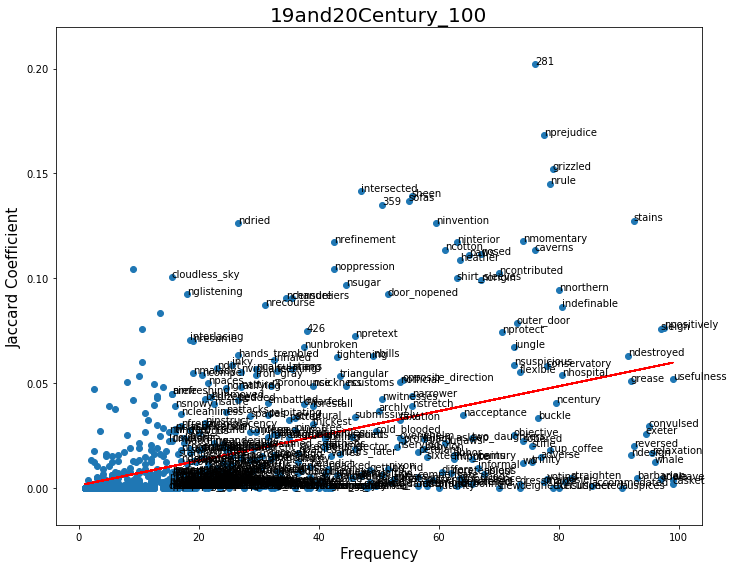

In [73]:
plotting(t_dict_1920,"19and20Century_100",100)

coeff of graph is..  0.00027559421689076326


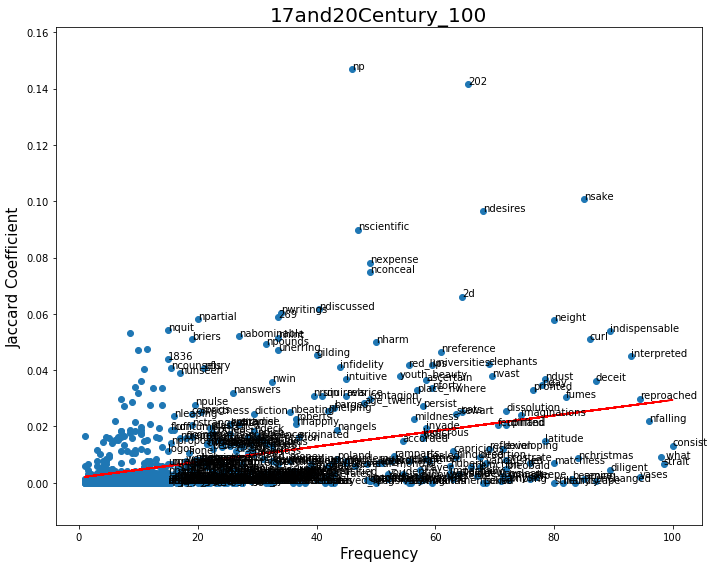

In [74]:
plotting(t_dict_1720, "17and20Century_100",100)


### get distribution of frequncy of word

In [59]:
df17 = pd.DataFrame(order_dict_17, columns=['Word', 'Frequency'])

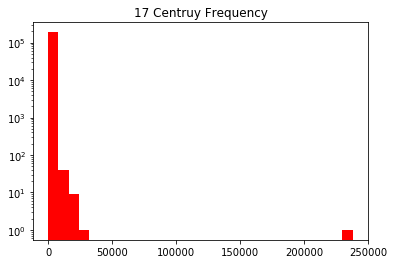

In [75]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df17['Frequency'], bins=30 , color='r')
#plt.xlim(0,100000)
ax.set_yscale('log')
plt.title('17 Centruy Frequency')
plt.savefig('plots/17c_freq.png')
plt.show()

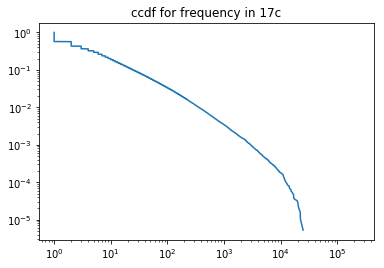

In [76]:
sorted_data = np.sort(df17['Frequency'])
cdf = np.arange(len(sorted_data))/float(len(sorted_data)-1)
ccdf = 1- cdf
plt.loglog(sorted_data, ccdf)
plt.title('ccdf for frequency in 17c')
plt.savefig('plots/17c_freq_ccdf.png')
plt.show()


In [62]:
df19 = pd.DataFrame(order_dict_19, columns = ['Word', 'Frequency'])

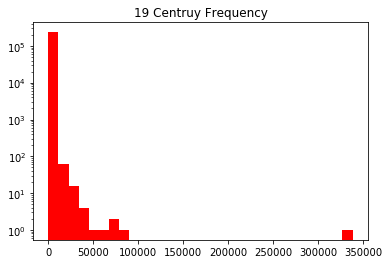

In [77]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df19['Frequency'], bins=30 , color='r')
#plt.xlim(0,100000)
ax.set_yscale('log')
plt.title('19 Centruy Frequency')
plt.savefig('plots/19c_freq.png')
plt.show()

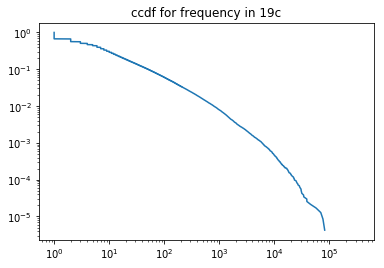

In [78]:
sorted_data = np.sort(df19['Frequency'])
cdf = np.arange(len(sorted_data))/float(len(sorted_data)-1)
ccdf = 1- cdf
plt.loglog(sorted_data, ccdf)

plt.title('ccdf for frequency in 19c')
plt.savefig('plots/19c_freq_ccdf.png')
plt.show()

In [65]:
df20 = pd.DataFrame(order_dict_20, columns = ['Word', 'Frequency'])

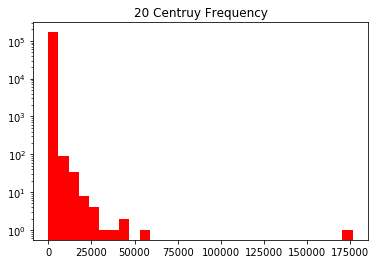

In [79]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df20['Frequency'], bins=30 , color='r')
#plt.xlim(0,100000)
ax.set_yscale('log')
plt.title('20 Centruy Frequency')
plt.savefig('plots/20c_freq.png')
plt.show()

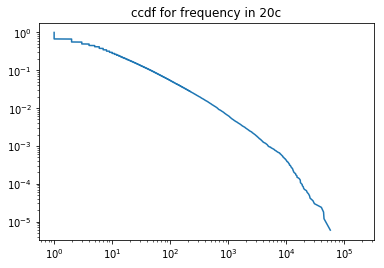

In [80]:
sorted_data = np.sort(df20['Frequency'])
cdf = np.arange(len(sorted_data))/float(len(sorted_data)-1)
ccdf = 1- cdf
plt.loglog(sorted_data, ccdf)

plt.title('ccdf for frequency in 20c')
plt.savefig('plots/20c_freq_ccdf.png')
plt.show()